In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df_train.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
from wordcloud import WordCloud
import re

In [ ]:
df_train['cleaned_text'] = df_train['text'].apply(lambda x: re.sub(r'\W+', ' ', x))

In [ ]:
from wordcloud import STOPWORDS

# Tạo một tập hợp các stopword (có thể bổ sung thêm từ vào danh sách này nếu cần)
stopwords = set(STOPWORDS)
# stopwords.update(["word1", "word2"])  # Thêm các từ cần loại bỏ vào danh sách stopwords

# Kết hợp tất cả các văn bản trong cột 'cleaned_text'
text = " ".join(review for review in df_train.cleaned_text)

In [ ]:
from wordcloud import STOPWORDS

# Tạo một tập hợp các stopword (có thể bổ sung thêm từ vào danh sách này nếu cần)
stopwords = set(STOPWORDS)
# stopwords.update(["word1", "word2"])  # Thêm các từ cần loại bỏ vào danh sách stopwords

# Kết hợp tất cả các văn bản trong cột 'cleaned_text'
text = " ".join(review for review in df_train.cleaned_text)

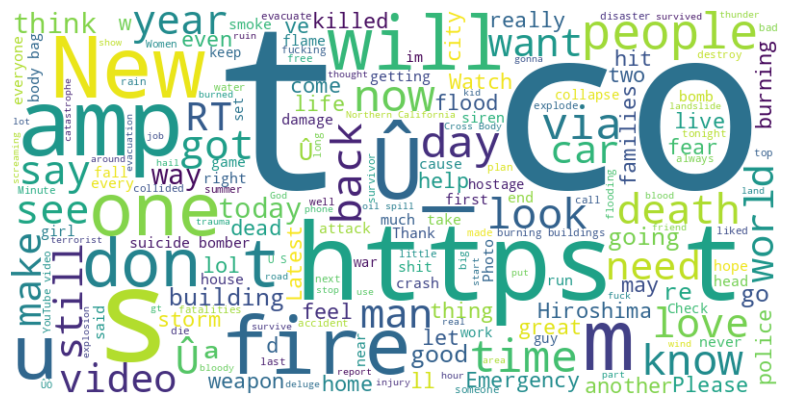

In [ ]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stopwords  # Sử dụng stopwords để loại bỏ từ không cần thiết
).generate(text)

# Hiển thị Wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_train.head()

,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13 000 people receive wildfires evacuation ord...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_train['cleaned_text']).toarray()

y = df_train['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính toán độ chính xác (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Hiển thị báo cáo phân loại
print(classification_report(y_test, y_pred))

# Hiển thị ma trận nhầm lẫn (confusion matrix)
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       874
           1       0.82      0.70      0.75       649

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.80      0.80      1523

[[773 101]
 [196 453]]


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Độ chính xác của mô hình
    'solver': ['lbfgs', 'liblinear']  # Các phương pháp tối ưu hóa
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
# In ra bộ tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Sử dụng mô hình với bộ tham số tốt nhất
best_model = grid_search.best_estimator_

# Đánh giá mô hình với tập kiểm tra
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the best model: {accuracy:.2f}')

Best parameters found:  {'C': 1, 'solver': 'lbfgs'}
Accuracy of the best model: 0.80


Confusion Matrix:
[[773 101]
 [196 453]]


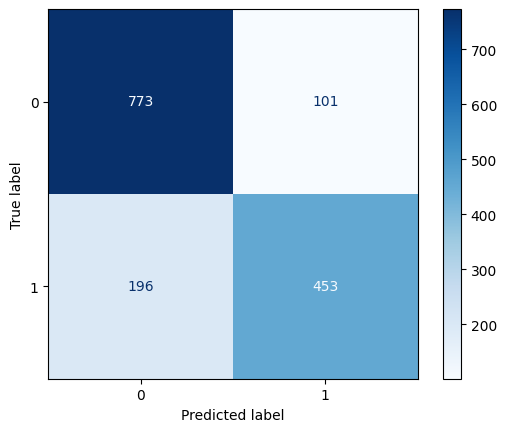

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix dưới dạng bảng số
print("Confusion Matrix:")
print(cm)

# Hiển thị confusion matrix dưới dạng đồ họa
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'\W+', ' ', x))

In [ ]:
df_test.drop(columns=['cleaned_text'])

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,Heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTEN...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane My city ...
3260,10868,NaN,NaN,Green Line derailment in Chicago http t co Utb...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook HWO http ...


In [ ]:
from wordcloud import STOPWORDS

# Tạo một tập hợp các stopword (có thể bổ sung thêm từ vào danh sách này nếu cần)
stopwords = set(STOPWORDS)
# stopwords.update(["word1", "word2"])  # Thêm các từ cần loại bỏ vào danh sách stopwords

# Kết hợp tất cả các văn bản trong cột 'cleaned_text'
text = " ".join(review for review in df_test.text)

In [ ]:
df_test.head(10)

,id,keyword,location,text,cleaned_text
0,0,NaN,NaN,Just happened a terrible car crash,Just happened a terrible car crash
1,2,NaN,NaN,Heard about earthquake is different cities sta...,Heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We re shaking It s an earthquake,We re shaking It s an earthquake
6,21,NaN,NaN,They d probably still show more life than Arse...,They d probably still show more life than Arse...
7,22,NaN,NaN,Hey How are you,Hey How are you
8,27,NaN,NaN,What a nice hat,What a nice hat
9,29,NaN,NaN,Fuck off,Fuck off


In [ ]:
df_test.drop(columns=['cleaned_text'])

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,Heard about earthquake is different cities sta...
2,3,NaN,NaN,there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTEN...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane My city ...
3260,10868,NaN,NaN,Green Line derailment in Chicago http t co Utb...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook HWO http ...


In [ ]:
X_test = vectorizer.transform(df_test['text'])
test_predictions = best_model.predict(X_test)
submission = pd.DataFrame({
    'id': df_test['id'],
    'target': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv


In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
